In [2]:
import numpy as np
import matplotlib.pyplot as plt

import adaptivealgo.cli.policy_iter as pi
from adaptivealgo.lib.simulator import Simulator
import adaptivealgo.cli.simulate_policy as sim

In [3]:
n_links = 4
f_thresh = 0.4
actions = [0.1, 0.2, 0.3, 0.4, 0.5]
alpha = 1.0
gamma = 0.2
tol = 1e-6

n_episodes = 10_000

In [4]:
policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
opt_policy: dict = policy["policy"]
print(f"Policy iteration took {i} iterations")

simulator = Simulator(opt_policy, n_links, f_thresh, actions, alpha, gamma)
opt_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {int(np.mean(opt_samples))} steps")

Policy iteration took 2 iterations
Mean runtime: 25 steps


In [5]:
random_policy = {s: np.random.randint(0, len(actions)) for s in opt_policy.keys()}
simulator = Simulator(random_policy, n_links, f_thresh, actions, alpha, gamma)
random_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime for random policy: {int(np.mean(random_samples))} steps")

Mean runtime for random policy: 129 steps


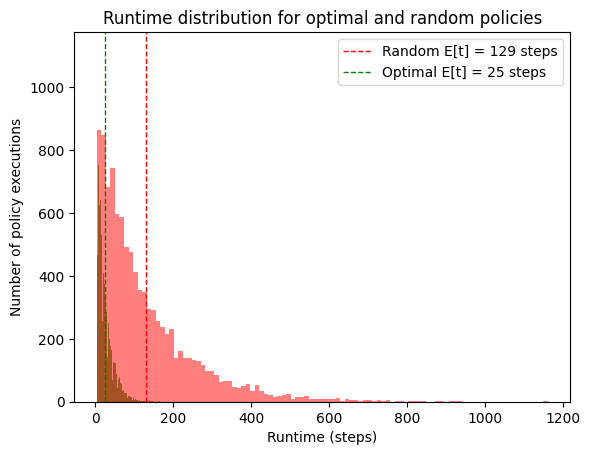

In [6]:
plt.hist(opt_samples, bins=100, color='g', alpha=0.7)
plt.hist(random_samples, bins=100, color='r', alpha=0.5)

plt.axvline(np.mean(random_samples), color='r', linestyle='--', linewidth=1)
plt.axvline(np.mean(opt_samples), color='g', linestyle='--', linewidth=1)

plt.title('Runtime distribution for optimal and random policies')
plt.xlabel('Runtime (steps)')
plt.ylabel('Number of policy executions')

plt.legend([f'Random E[t] = {int(np.mean(random_samples))} steps', f'Optimal E[t] = {int(np.mean(opt_samples))} steps'])
plt.show()

Policy iteration for 2 links took 2 iterations
Policy iteration for 3 links took 2 iterations
Policy iteration for 4 links took 2 iterations
Policy iteration for 5 links took 3 iterations


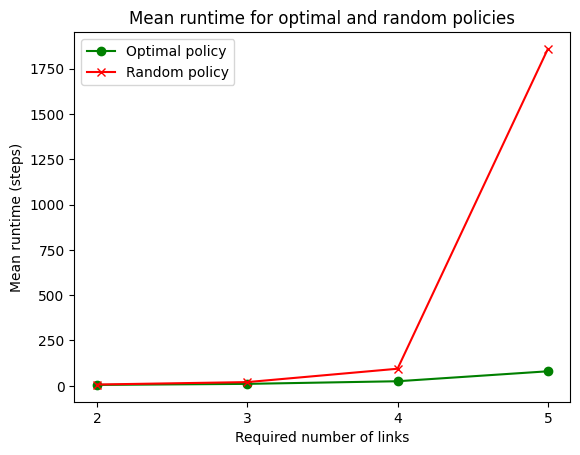

In [8]:
means_opt = []
means_random = []

stds_opt = []
stds_random = []

for n_links in range(2, 6):
    policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
    opt_policy: dict = policy["policy"]
    print(f"Policy iteration for {n_links} links took {i} iterations")

    simulator = Simulator(opt_policy, n_links, f_thresh, actions, alpha, gamma)
    opt_samples = sim.gen_policy_samples(simulator, n_episodes)
    means_opt.append(np.mean(opt_samples))
    stds_opt.append(np.std(opt_samples))

    random_policy = {s: np.random.randint(0, len(actions)) for s in opt_policy.keys()}
    simulator = Simulator(random_policy, n_links, f_thresh, actions, alpha, gamma)
    random_samples = sim.gen_policy_samples(simulator, n_episodes)

    means_random.append(np.mean(random_samples))
    stds_random.append(np.std(random_samples))

plt.plot(range(2, 6), means_opt, color='g', marker='o', label='Optimal policy')
plt.plot(range(2, 6), means_random, color='r', marker='x', label='Random policy')

plt.title('Mean runtime for optimal and random policies')
plt.xlabel('Required number of links')
plt.ylabel('Mean runtime (steps)')
plt.xticks(range(2, 6))
plt.legend()
plt.show()

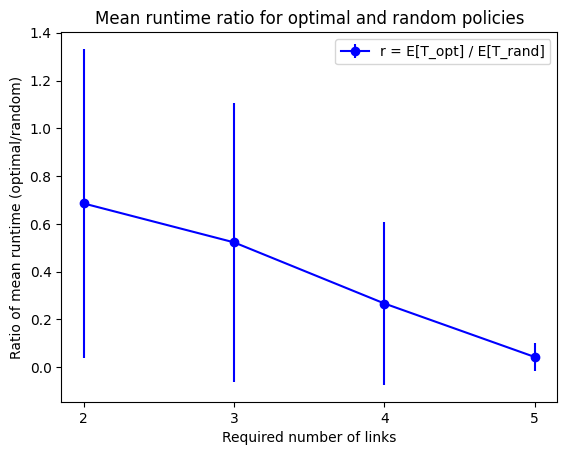

In [12]:
def ratio_std(m_x, sigma_x, m_y, sigma_y):
    return np.sqrt((sigma_x / m_x)**2 + (sigma_y / m_y)**2) * abs(m_x / m_y)

plt.errorbar(range(2, 6), np.array(means_opt) / np.array(means_random), yerr=[ratio_std(m_x, sigma_x, m_y, sigma_y) for m_x, sigma_x, m_y, sigma_y in zip(means_opt, stds_opt, means_random, stds_random)], color='b', marker='o', label='r = E[T_opt] / E[T_rand]')
plt.title('Mean runtime ratio for optimal and random policies')
plt.xlabel('Required number of links')
plt.ylabel('Ratio of mean runtime (optimal/random)')
plt.xticks(range(2, 6))
plt.legend()
plt.show()